# Yelp Data Challenge - Restaurant Recommender
### For Las Vegas
    Patrick 🌰栗子
  


In [1]:
import graphlab

[WARNING] graphlab.product_key: Unable to write current GraphLab Create license to /Users/lipengyuan/.graphlab/config. Ensure that this user account                         has write permission to /Users/lipengyuan/.graphlab/config to save the license for offline use.
[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1544474069.log


This non-commercial license of GraphLab Create for academic use is assigned to li_peng@bentley.edu and will expire on August 01, 2019.


[WARNING] graphlab.deploy._session: Unable to create session in specified location: '/Users/lipengyuan/.graphlab/artifacts'. Using: '/var/tmp/graphlab-lipengyuan/1852/tmp_session_3611d7a7-11aa-4aca-a5f5-882512ea8ad3'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

/Users/lipengyuan/anaconda3/envs/gl-env1/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
df = pd.read_csv('lasvegasrestfinallast2year.csv')

In [4]:
df.head()

,Unnamed: 0,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,15,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
3,31,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-05-20,0,Pnkrj90xfykhHyo4BSFRsw,5,ABSOLUTE MUST IN VEGAS! Loved everything my bo...,0,cZVQGCZ_fHtTdfiyGVJPdg
4,45,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-30,0,Oeh7e6U2xaDQI9L9i4x_Gw,2,I had high hopes for Delmonico's Steakhouse in...,0,li2cBZl60vgqihDJJG7jeA


## 1. Clean data and get rating data 

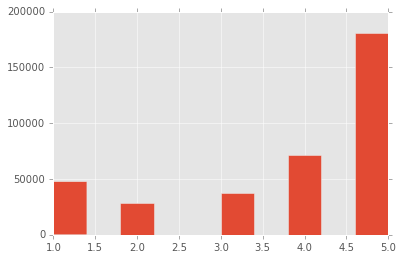

In [5]:
# Get business_id, user_id, stars for recommender
df_stars = df[['business_id', 'user_id', 'stars']]
# stars distribution
df_stars['stars'].hist()

In [6]:
df_stars['business_id'].nunique() 
# number of unique elements

4550

In [7]:
# number of unique user_id
df_stars['user_id'].nunique()

176960

In [8]:
# user comments counts
df_user_counts = df_stars['user_id'].value_counts()
df_user_counts.head(20)

bLbSNkLggFnqwNNzzq-Ijw    333
JaqcCU3nxReTW2cBLHounA    213
YE54kKTuqJJPNYWIKIpOEQ    185
I-4KVZ9lqHhk8469X9FvhA    176
U4INQZOPSUaj8hMjLlZ3KA    148
keBv05MsMFBd0Hu98vXThQ    145
OXSJCjKtvZPf-YPDCXcWZg    141
lQBZo8_mm80dbwI5bo5c_w    139
PKEzKWv_FktMm2mGPjwd0Q    138
JQIZhoQB-Tg9hdBEj90m4g    123
8dxkcmAXY4ttrVFD1GhbdQ    120
NrpzAH3EoNhWUR8OysUhBQ    116
sCelgwFoaNLMC_A7Y8usCw    112
byV70bKT87SHgN0uRtow6w    109
y3FcL4bLy0eLlkb0SDPnBQ    106
qPVtjjp8sNQ32p9860SR9Q    102
NhgU7RhuYYFmpkb1jlYJ6Q     98
6YmRpoIuiq8I19Q8dHKTHw     97
lQCY0csLfjdDn6cdVq43UA     96
P0rGN5mDue55uIiAzkrRlw     95
Name: user_id, dtype: int64

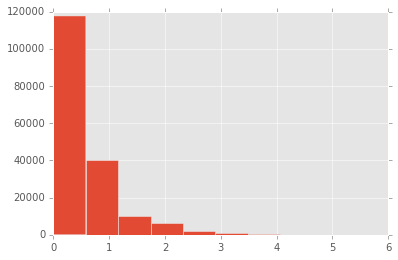

In [9]:
# display log histogram
# df_user_counts.hist()
df_user_counts.apply(np.log).hist()
plt.show()

#### There are many users that haven't given many reviews, exclude these users from the item-item similarity recommender



In [10]:
# how many users only comments once
df_user_counts[df_user_counts == 1].sum()

117664

In [11]:
# users comment over 5 times
df_users = df_user_counts[df_user_counts > 5]
# count users comment over 5 times as active user
df_users.count()

9396

In [12]:
# display active user id
df_users.index

Index([u'bLbSNkLggFnqwNNzzq-Ijw', u'JaqcCU3nxReTW2cBLHounA',
       u'YE54kKTuqJJPNYWIKIpOEQ', u'I-4KVZ9lqHhk8469X9FvhA',
       u'U4INQZOPSUaj8hMjLlZ3KA', u'keBv05MsMFBd0Hu98vXThQ',
       u'OXSJCjKtvZPf-YPDCXcWZg', u'lQBZo8_mm80dbwI5bo5c_w',
       u'PKEzKWv_FktMm2mGPjwd0Q', u'JQIZhoQB-Tg9hdBEj90m4g',
       ...
       u'cKTwpQOnnu2KjfINPRhRTw', u'1jMUzrfaN1Bajf7m-gXbUg',
       u'fr1XVKLZB0JbkijfzxMoXg', u'HMrdhoMQoAkh_5rrmFvSfw',
       u'2dLz_y1_rUHj9O3_lJfT9w', u'sWpQ5sNssxFdWIU9iuwUCw',
       u'UiDCy0-fdHG6IwHg9mn8Dw', u'67HwuY1mtttvvnqn9tHU0Q',
       u'1Rc0tO2rDkKVuI93piE_1A', u'7PHHxsjyk7I7oM6ENxwZZQ'],
      dtype='object', length=9396)

In [13]:
# reorder dataframe
df_stars_cleaned = df_stars.set_index('user_id').ix[df_users.index].reset_index()
df_stars_cleaned.head()

,user_id,business_id,stars
0,bLbSNkLggFnqwNNzzq-Ijw,-CQokjildrY7UZezXCdEBw,5
1,bLbSNkLggFnqwNNzzq-Ijw,-WLrZPzjKfrftLWaCi1QZQ,3
2,bLbSNkLggFnqwNNzzq-Ijw,-a43zqioXNOjx_QejRS9FA,4
3,bLbSNkLggFnqwNNzzq-Ijw,-pG5srxtnRkd1bdIYn78xA,4
4,bLbSNkLggFnqwNNzzq-Ijw,-qYuPncpK8elgD-6Qx3v7A,3


In [14]:
df_utility = pd.pivot_table(data=df_stars_cleaned,
                            values='stars', # fill with stars
                            index='user_id', # rows
                            columns='business_id', # columns
                            fill_value=0) # fill missings

In [15]:
df_utility.head()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,-1m9o3vGRA8IBPNvNqKLmA,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-ADtl9bLp8wNqYX1k3KuxA,-Bf8BQ3yMk8U2f45r2DRKw,-BmqghX1sv7sgsxOIS2yAg,-Bv-HHUs8aHzDrdWcZHn8w,...,zmltWmTpoBt5sCU-5Kzj-Q,znWHLW1pt19HzW1VY6KfCA,zp-K5s3pGTWuuaVBWo6WZA,zpoZ6WyQUYff18-z4ZU1mA,zr42_UsWfaIF-rcp37OpwA,zsQk990PubOHjr1YcLkQFw,zttcrQP4MxNS5X5itzStXg,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg,zx_j6OuuHHa2afVoAZuLpA
user_id,,,,,,,,,,,,,,,,,,,,,
--ZNfWKj1VyVElRx6-g1fg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
-0Hf2jiBo7hJdxYW0Y6PKQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0OyT3le0GqdyvRLLfB7MQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-16aKjco1c0RJ7c4U-q_Kw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2gOxVWcnBr5DclrrsWXCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# get the list of user id by checking out the index of the utility matrix
user_id_list = df_utility.index
user_id_list.shape

(9396,)

In [17]:
# get the list of item id by checking out the columns of the utility matrix
item_id_list = df_utility.columns
item_id_list.shape

(4194,)

## recommendation system with graphlab

In [ ]:
import graphlab
# li_peng@bentley.edu
# Product key: EE1C-F268-44A4-8C68-DC7F-E841-76EB-8765
    
# pip install --upgrade --no-cache-dir https://get.graphlab.com/GraphLab-Create/2.1/li_peng@bentley.edu/EE1C-F268-44A4-8C68-DC7F-E841-76EB-8765/GraphLab-Create-License.tar.gz

## 2. Item-Item similarity recommender

In [18]:
sf_stars = graphlab.SFrame(df_stars)
sf_stars # SFrame similar to DataFrame

business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,ymlnR8UeFvB4FZL56tCZsA,5
--9e1ONYQuAa-CB_Rrw7Tw,9pSSL6X6lFpY3FCRLEH3og,5
--9e1ONYQuAa-CB_Rrw7Tw,CEtidlXNyQzgJSdF1ubPFw,3
--9e1ONYQuAa-CB_Rrw7Tw,cZVQGCZ_fHtTdfiyGVJPdg,5
--9e1ONYQuAa-CB_Rrw7Tw,li2cBZl60vgqihDJJG7jeA,2
--9e1ONYQuAa-CB_Rrw7Tw,zGipc5uOJrejX6KkUsSNpA,4
--9e1ONYQuAa-CB_Rrw7Tw,Lgmfl_A0cy72dwZfbuh9Tg,4
--9e1ONYQuAa-CB_Rrw7Tw,nGw_csaHeNdtb3IpSmtuGA,2
--9e1ONYQuAa-CB_Rrw7Tw,KC8H7qTZVPIEnanw9fG43g,5
--9e1ONYQuAa-CB_Rrw7Tw,P1O81PTvXaR9kYKaP3_qwg,5


In [19]:
# item-item recommender
item_item_rec = graphlab.recommender.item_similarity_recommender.create(sf_stars,user_id='user_id',
                                                                        item_id='business_id',
                                                                        target = 'stars')

Recsys training: model = item_similarity

Preparing data set.

Data has 365550 observations with 176960 users and 4550 items.

Data prepared in: 0.651703s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.071ms                        | 6          |

| 45.187ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 128.603ms                           | 0                | 0               |

| 437.078ms                           | 100              | 4550            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.48826s

In [20]:
item_item_rec_result = item_item_rec.recommend(k=3, verbose=False)

In [21]:
item_item_rec_result

user_id,business_id,score,rank
ymlnR8UeFvB4FZL56tCZsA,J4CATH00YZrq8Bne2S4_cw,0.0204778313637,1
ymlnR8UeFvB4FZL56tCZsA,rcaPajgKOJC2vo_l3xa42A,0.0176795721054,2
ymlnR8UeFvB4FZL56tCZsA,qFAw6wHMMcr4ctF-ZdGhEA,0.0146138072014,3
9pSSL6X6lFpY3FCRLEH3og,dubu2kN3Y9EB4uYGFWa0MQ,0.0155709385872,1
9pSSL6X6lFpY3FCRLEH3og,J4CATH00YZrq8Bne2S4_cw,0.0102389156818,2
9pSSL6X6lFpY3FCRLEH3og,SeNOJ2zYHziptxLuiRINLg,0.0100431740284,3
CEtidlXNyQzgJSdF1ubPFw,QJatAcxYgK1Zp9BRZMAx7g,0.00976059834162,1
CEtidlXNyQzgJSdF1ubPFw,77h11eWv6HKJAgojLx8G4w,0.00916230678558,2
CEtidlXNyQzgJSdF1ubPFw,uuGL8diLlHfeUeFuod3F-w,0.00723868608475,3
cZVQGCZ_fHtTdfiyGVJPdg,J4CATH00YZrq8Bne2S4_cw,0.0204778313637,1


# 3. Content-based recommender

In [22]:
# group by business_id, then average numerical features

df_average = df.groupby(['business_id']).mean()
df_average.head()

,Unnamed: 0,avg_stars,cool,funny,stars,useful
business_id,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,822.892256,4.0,0.942761,0.572391,4.148148,1.195286
-1m9o3vGRA8IBPNvNqKLmA,1641.000000,4.5,0.580838,0.299401,4.592814,1.017964
-3zffZUHoY8bQjGfPSoBKQ,2161.040404,4.0,1.313131,1.080808,3.898990,1.868687
-8R_-EkGpUhBk55K9Dd4mg,2483.500000,3.5,0.725000,0.600000,4.200000,0.875000
-9YyInW1wapzdNZrhQJ9dg,2639.220339,2.5,0.203390,0.169492,2.779661,1.067797


In [23]:
# group by business_id, extract categories data

categories_series = df.groupby(['business_id']).categories.apply(np.unique)
categories_series.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw             [Steakhouses, Restaurants, Cajun/Creole]
-1m9o3vGRA8IBPNvNqKLmA    [African, Restaurants, Bars, American (New), C...
-3zffZUHoY8bQjGfPSoBKQ    [Nightlife, American (New), Bars, Seafood, Res...
-8R_-EkGpUhBk55K9Dd4mg                                  [Restaurants, Thai]
-9YyInW1wapzdNZrhQJ9dg                               [Restaurants, Buffets]
Name: categories, dtype: object

In [24]:
# convert categories data to string remove `[]`
categories_series = categories_series.str.join('').apply(lambda x: x[1:-1])

In [25]:
# business_id, categories table
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
categories_mat = vectorizer.fit_transform(categories_series).toarray()
categories = vectorizer.get_feature_names()
df_categories = pd.DataFrame(categories_mat,
                             columns=categories, 
                             index=categories_series.index)
df_categories.head()

,acai,acarons,acos,active,activities,acupuncture,adoption,adult,afes,afeteria,...,women,wrap,wraps,yelash,yms,yogur,yogurt,yourself,zakaya,zechuan
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1m9o3vGRA8IBPNvNqKLmA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3zffZUHoY8bQjGfPSoBKQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8R_-EkGpUhBk55K9Dd4mg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-9YyInW1wapzdNZrhQJ9dg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# use svd to reduce dimension
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=150,
                   random_state=42)

svd.fit(categories_mat)
categories_svd = svd.transform(categories_mat)
df_categories_svd = pd.DataFrame(categories_svd,
                                 index=categories_series.index)

print(svd.explained_variance_ratio_.sum()) # total variance explained
df_categories_svd.head()

0.906048244716


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0.512939,0.077172,-0.627304,-0.008562,-0.080300,-0.400902,0.035088,0.111701,-0.279039,-0.014139,...,0.124465,-0.081427,-0.036375,0.011302,-0.033737,0.016370,-0.017786,0.030622,-0.058617,0.003819
-1m9o3vGRA8IBPNvNqKLmA,1.869801,1.766107,-0.046958,0.256093,0.702386,0.239744,-0.147573,-0.287430,-0.152062,-0.575805,...,-0.015253,0.000789,-0.021166,0.001060,0.016171,0.026428,-0.056866,-0.028400,0.032341,0.032067
-3zffZUHoY8bQjGfPSoBKQ,1.010217,0.905094,0.929597,0.624379,-0.218638,0.024202,0.005475,-0.229199,-0.116770,-0.921204,...,0.001244,0.050103,0.030503,0.002676,-0.011805,0.021594,0.022220,-0.014641,-0.013664,0.009695
-8R_-EkGpUhBk55K9Dd4mg,0.141581,-0.040164,0.464721,-0.715113,0.203997,-0.200633,0.123290,0.228312,-0.213223,-0.006168,...,0.048699,0.032499,-0.011501,0.011288,-0.038182,-0.009681,-0.002972,0.005850,-0.000244,-0.043431
-9YyInW1wapzdNZrhQJ9dg,0.142200,-0.035728,0.462518,-0.712868,0.202336,-0.203241,0.121576,0.231939,-0.209111,-0.002392,...,-0.006417,0.037609,-0.043397,0.010293,-0.006377,0.040957,-0.007976,-0.000393,0.013848,-0.017477


In [27]:
# display feature matrix dimension

print 'df_average : ', df_average.shape
print 'df_categories : ', df_categories.shape
print 'df_categories_svd : ', df_categories_svd.shape

df_average :  (4550, 6)
df_categories :  (4550, 802)
df_categories_svd :  (4550, 150)


In [28]:
# join two to generate feature data for each business_id

df_business = df_average.join(df_categories_svd)

In [29]:
print df_business.shape
df_business.head()

(4550, 156)


,Unnamed: 0,avg_stars,cool,funny,stars,useful,0,1,2,3,...,140,141,142,143,144,145,146,147,148,149
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,822.892256,4.0,0.942761,0.572391,4.148148,1.195286,0.512939,0.077172,-0.627304,-0.008562,...,0.124465,-0.081427,-0.036375,0.011302,-0.033737,0.016370,-0.017786,0.030622,-0.058617,0.003819
-1m9o3vGRA8IBPNvNqKLmA,1641.000000,4.5,0.580838,0.299401,4.592814,1.017964,1.869801,1.766107,-0.046958,0.256093,...,-0.015253,0.000789,-0.021166,0.001060,0.016171,0.026428,-0.056866,-0.028400,0.032341,0.032067
-3zffZUHoY8bQjGfPSoBKQ,2161.040404,4.0,1.313131,1.080808,3.898990,1.868687,1.010217,0.905094,0.929597,0.624379,...,0.001244,0.050103,0.030503,0.002676,-0.011805,0.021594,0.022220,-0.014641,-0.013664,0.009695
-8R_-EkGpUhBk55K9Dd4mg,2483.500000,3.5,0.725000,0.600000,4.200000,0.875000,0.141581,-0.040164,0.464721,-0.715113,...,0.048699,0.032499,-0.011501,0.011288,-0.038182,-0.009681,-0.002972,0.005850,-0.000244,-0.043431
-9YyInW1wapzdNZrhQJ9dg,2639.220339,2.5,0.203390,0.169492,2.779661,1.067797,0.142200,-0.035728,0.462518,-0.712868,...,-0.006417,0.037609,-0.043397,0.010293,-0.006377,0.040957,-0.007976,-0.000393,0.013848,-0.017477


In [30]:
# prepare data

item_data = graphlab.SFrame(df_business.reset_index())

In [31]:
# build content based recommender

content_rec = graphlab.recommender.item_content_recommender.create(item_data, "business_id")

('Applying transform:\n', Class             : AutoVectorizer

Model Fields
------------
Features          : ['Unnamed: 0', 'avg_stars', 'cool', 'funny', 'stars', 'useful', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', 

Recsys training: model = item_content_recommender

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 4550    | 0.021978    | 261.073ms    |

| 54           | 245700  | 1.18681     | 1.26s        |

| 113          | 514150  | 2.48352     | 2.27s        |

| 172          | 782600  | 3.78022     | 3.27s        |

| 221          | 1005550 | 4.85714     | 4.28s        |

| 271          | 1233050 | 5.95604     | 5.30s        |

| 321          | 1460550 | 7.05495     | 6.29s        |

| 393          | 1788150 | 8.63736     | 7.29s        |

| 468          | 2129400 | 10.2857     | 8.29s        |

| 535          | 2434250 | 11.7582     | 9.30s        |

| 606          | 2757300 | 13.3187     | 10.32s       |

| 668          | 3039400 | 14.6813     | 11.31s       |

| 735          | 3344250 | 16.1538     | 12.34s       |

| 803          | 3653650 | 17.6484     | 13.32s       |

| 859          | 3908450 | 18.8791     | 14.33s       |

| 920          | 4186000 | 20.2198     | 15.34s       |

| 985          | 4481750 | 21.6484     | 16.35s       |

| 1019         | 4636450 | 22.3956     | 17.36s       |

| 1066         | 4850300 | 23.4286     | 18.34s       |

| 1121         | 5100550 | 24.6374     | 19.39s       |

| 1181         | 5373550 | 25.956      | 20.36s       |

| 1235         | 5619250 | 27.1429     | 21.37s       |

| 1302         | 5924100 | 28.6154     | 22.38s       |

| 1373         | 6247150 | 30.1758     | 23.44s       |

| 1446         | 6579300 | 31.7802     | 24.39s       |

| 1529         | 6956950 | 33.6044     | 25.39s       |

| 1616         | 7352800 | 35.5165     | 26.38s       |

| 1701         | 7739550 | 37.3846     | 27.38s       |

| 1791         | 8149050 | 39.3626     | 28.40s       |

| 1881         | 8558550 | 41.3407     | 29.40s       |

| 1961         | 8922550 | 43.0989     | 30.39s       |

| 2048         | 9318400 | 45.011      | 31.43s       |

| 2133         | 9705150 | 46.8791     | 32.40s       |

| 2224         | 1e+07   | 48.8791     | 33.41s       |

| 2313         | 1.1e+07 | 50.8352     | 34.41s       |

| 2398         | 1.1e+07 | 52.7033     | 35.42s       |

| 2486         | 1.1e+07 | 54.6374     | 36.43s       |

| 2570         | 1.2e+07 | 56.4835     | 37.43s       |

| 2658         | 1.2e+07 | 58.4176     | 38.44s       |

| 2746         | 1.2e+07 | 60.3516     | 39.45s       |

| 2830         | 1.3e+07 | 62.1978     | 40.44s       |

| 2916         | 1.3e+07 | 64.0879     | 41.45s       |

| 3006         | 1.4e+07 | 66.0659     | 42.46s       |

| 3087         | 1.4e+07 | 67.8462     | 43.46s       |

| 3175         | 1.4e+07 | 69.7802     | 44.46s       |

| 3246         | 1.5e+07 | 71.3407     | 45.47s       |

| 3301         | 1.5e+07 | 72.5495     | 46.47s       |

| 3370         | 1.5e+07 | 74.0659     | 47.48s       |

| 3444         | 1.6e+07 | 75.6923     | 48.48s       |

| 3521         | 1.6e+07 | 77.3846     | 49.49s       |

| 3572         | 1.6e+07 | 78.5055     | 50.51s       |

| 3641         | 1.7e+07 | 80.022      | 51.50s       |

| 3708         | 1.7e+07 | 81.4945     | 52.51s       |

| 3772         | 1.7e+07 | 82.9011     | 53.50s       |

| 3840         | 1.7e+07 | 84.3956     | 54.52s       |

| 3898         | 1.8e+07 | 85.6703     | 55.51s       |

| 3960         | 1.8e+07 | 87.033      | 56.52s       |

| 4028         | 1.8e+07 | 88.5275     | 57.53s       |

| 4096         | 1.9e+07 | 90.022      | 58.54s       |

| 4182         | 1.9e+07 | 91.9121     | 59.53s       |

| 4273         | 1.9e+07 | 93.9121     | 1m 0s        |

| 4363         | 2e+07   | 95.8901     | 1m 1s        |

| 4453         | 2e+07   | 97.8681     | 1m 2s        |

| 4541         | 2.1e+07 | 99.8022     | 1m 3s        |

| Done         |         | 100         | 1m 3s        |

+--------------+---------+-------------+--------------+

Preparing data set.

Data has 0 observations with 0 users and 4550 items.

Data prepared in: 0.747364s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.035695s

In [34]:
sample_item

['--9e1ONYQuAa-CB_Rrw7Tw']

In [33]:
# make recommendation for a single item

sample_item = [df_stars.iloc[0].business_id]
content_rec.recommend_from_interactions(sample_item) # recommendation from single item

business_id,score,rank
uWECX6-Uq9n8v5ipk9R29A,0.810299158096,1
ZPwx7ktiVluGFVg0L05n5A,0.794113636017,2
7wMCJ9NqL9eBEX4WdJWuIA,0.7718359828,3
JijwZPUuFqQqUekNR--dfw,0.770135462284,4
IT_4EEIbv6Ox1jBRMyE7pg,0.769596159458,5
nnDLapJk1z2NJE0-XzwMlQ,0.769540011883,6
B0Vm2tge4I2JJlZhD4sl0Q,0.768489122391,7
bSY97kgQpJ5BrpgW40V1qg,0.76802778244,8
gdWy-x5KbCbMrwIwI87mMg,0.767488718033,9
L_ZLtfHvfzfoNVQ0-okTXg,0.767484724522,10


In [35]:
# similar items per item

similar_items_df = content_rec.get_similar_items().to_dataframe()
similar_items_df.head(30)

,business_id,similar,score,rank
0,--9e1ONYQuAa-CB_Rrw7Tw,uWECX6-Uq9n8v5ipk9R29A,0.810299,1
1,--9e1ONYQuAa-CB_Rrw7Tw,ZPwx7ktiVluGFVg0L05n5A,0.794114,2
2,--9e1ONYQuAa-CB_Rrw7Tw,7wMCJ9NqL9eBEX4WdJWuIA,0.771836,3
3,--9e1ONYQuAa-CB_Rrw7Tw,JijwZPUuFqQqUekNR--dfw,0.770135,4
4,--9e1ONYQuAa-CB_Rrw7Tw,IT_4EEIbv6Ox1jBRMyE7pg,0.769596,5
5,--9e1ONYQuAa-CB_Rrw7Tw,nnDLapJk1z2NJE0-XzwMlQ,0.769540,6
6,--9e1ONYQuAa-CB_Rrw7Tw,B0Vm2tge4I2JJlZhD4sl0Q,0.768489,7
7,--9e1ONYQuAa-CB_Rrw7Tw,bSY97kgQpJ5BrpgW40V1qg,0.768028,8
8,--9e1ONYQuAa-CB_Rrw7Tw,gdWy-x5KbCbMrwIwI87mMg,0.767489,9
9,--9e1ONYQuAa-CB_Rrw7Tw,L_ZLtfHvfzfoNVQ0-okTXg,0.767485,10


In [36]:
# make recommendation for a sample user
df_favored = df_stars[df_stars.stars > 4] # select favored restuarants
bid_favored = df_favored[df_favored.user_id == df_favored.user_id.iloc[0]]

# first select favored restaurants' similar items
# second sort those restaurants, then got top 5
similar_items_df[similar_items_df['business_id'].isin(bid_favored.business_id)].sort('score',ascending=False).similar[:5]

/Users/lipengyuan/anaconda3/envs/gl-env1/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


0    uWECX6-Uq9n8v5ipk9R29A
1    ZPwx7ktiVluGFVg0L05n5A
2    7wMCJ9NqL9eBEX4WdJWuIA
3    JijwZPUuFqQqUekNR--dfw
4    IT_4EEIbv6Ox1jBRMyE7pg
Name: similar, dtype: object

# 4. Popularity-based recommender

In [37]:
sf_stars

business_id,user_id,stars
--9e1ONYQuAa-CB_Rrw7Tw,ymlnR8UeFvB4FZL56tCZsA,5
--9e1ONYQuAa-CB_Rrw7Tw,9pSSL6X6lFpY3FCRLEH3og,5
--9e1ONYQuAa-CB_Rrw7Tw,CEtidlXNyQzgJSdF1ubPFw,3
--9e1ONYQuAa-CB_Rrw7Tw,cZVQGCZ_fHtTdfiyGVJPdg,5
--9e1ONYQuAa-CB_Rrw7Tw,li2cBZl60vgqihDJJG7jeA,2
--9e1ONYQuAa-CB_Rrw7Tw,zGipc5uOJrejX6KkUsSNpA,4
--9e1ONYQuAa-CB_Rrw7Tw,Lgmfl_A0cy72dwZfbuh9Tg,4
--9e1ONYQuAa-CB_Rrw7Tw,nGw_csaHeNdtb3IpSmtuGA,2
--9e1ONYQuAa-CB_Rrw7Tw,KC8H7qTZVPIEnanw9fG43g,5
--9e1ONYQuAa-CB_Rrw7Tw,P1O81PTvXaR9kYKaP3_qwg,5


In [38]:
# build recommendation system
pop_rec = graphlab.popularity_recommender.create(sf_stars, 
                                                 user_id = 'user_id', 
                                                 item_id = 'business_id',
                                                 target = 'stars')

Recsys training: model = popularity

Preparing data set.

Data has 365550 observations with 176960 users and 4550 items.

Data prepared in: 0.679886s

365550 observations to process; with 4550 unique items.

In [39]:
# get recommendation
pop_result = pop_rec.recommend()

recommendations finished on 1000/176960 queries. users per second: 55279.2

recommendations finished on 2000/176960 queries. users per second: 52545.8

recommendations finished on 3000/176960 queries. users per second: 54505.8

recommendations finished on 4000/176960 queries. users per second: 54572.5

recommendations finished on 5000/176960 queries. users per second: 40392.9

recommendations finished on 6000/176960 queries. users per second: 39660

recommendations finished on 7000/176960 queries. users per second: 37236

recommendations finished on 8000/176960 queries. users per second: 37159.2

recommendations finished on 9000/176960 queries. users per second: 36393.5

recommendations finished on 10000/176960 queries. users per second: 34765.2

recommendations finished on 11000/176960 queries. users per second: 35152.6

recommendations finished on 12000/176960 queries. users per second: 34212.6

recommendations finished on 13000/176960 queries. users per second: 33962

recommendations finished on 14000/176960 queries. users per second: 33590.5

recommendations finished on 15000/176960 queries. users per second: 32692.4

recommendations finished on 16000/176960 queries. users per second: 33072.7

recommendations finished on 17000/176960 queries. users per second: 33102.9

recommendations finished on 18000/176960 queries. users per second: 31747.3

recommendations finished on 19000/176960 queries. users per second: 31494.1

recommendations finished on 20000/176960 queries. users per second: 31061.3

recommendations finished on 21000/176960 queries. users per second: 30169.3

recommendations finished on 22000/176960 queries. users per second: 30343.4

recommendations finished on 23000/176960 queries. users per second: 30468.7

recommendations finished on 24000/176960 queries. users per second: 30276.3

recommendations finished on 25000/176960 queries. users per second: 30309.7

recommendations finished on 26000/176960 queries. users per second: 30520.3

recommendations finished on 27000/176960 queries. users per second: 30237

recommendations finished on 28000/176960 queries. users per second: 29622.9

recommendations finished on 29000/176960 queries. users per second: 29625.3

recommendations finished on 30000/176960 queries. users per second: 29814.8

recommendations finished on 31000/176960 queries. users per second: 29522

recommendations finished on 32000/176960 queries. users per second: 29719.5

recommendations finished on 33000/176960 queries. users per second: 29784.3

recommendations finished on 34000/176960 queries. users per second: 29652.4

recommendations finished on 35000/176960 queries. users per second: 29892.4

recommendations finished on 36000/176960 queries. users per second: 29910.4

recommendations finished on 37000/176960 queries. users per second: 29681.4

recommendations finished on 38000/176960 queries. users per second: 29679.6

recommendations finished on 39000/176960 queries. users per second: 29507.9

recommendations finished on 40000/176960 queries. users per second: 29774.2

recommendations finished on 41000/176960 queries. users per second: 29914.1

recommendations finished on 42000/176960 queries. users per second: 30160.4

recommendations finished on 43000/176960 queries. users per second: 30311.5

recommendations finished on 44000/176960 queries. users per second: 30480

recommendations finished on 45000/176960 queries. users per second: 30103.2

recommendations finished on 46000/176960 queries. users per second: 29843.9

recommendations finished on 47000/176960 queries. users per second: 29528.5

recommendations finished on 48000/176960 queries. users per second: 29656.2

recommendations finished on 49000/176960 queries. users per second: 29412.2

recommendations finished on 50000/176960 queries. users per second: 29435.1

recommendations finished on 51000/176960 queries. users per second: 29503.8

recommendations finished on 52000/176960 queries. users per second: 29301.7

recommendations finished on 53000/176960 queries. users per second: 29241.6

recommendations finished on 54000/176960 queries. users per second: 29356.5

recommendations finished on 55000/176960 queries. users per second: 29299.8

recommendations finished on 56000/176960 queries. users per second: 28928.6

recommendations finished on 57000/176960 queries. users per second: 28909

recommendations finished on 58000/176960 queries. users per second: 28743.2

recommendations finished on 59000/176960 queries. users per second: 28546.4

recommendations finished on 60000/176960 queries. users per second: 28702.7

recommendations finished on 61000/176960 queries. users per second: 28841.2

recommendations finished on 62000/176960 queries. users per second: 28693.8

recommendations finished on 63000/176960 queries. users per second: 28647.9

recommendations finished on 64000/176960 queries. users per second: 28674.5

recommendations finished on 65000/176960 queries. users per second: 28785

recommendations finished on 66000/176960 queries. users per second: 28883.2

recommendations finished on 67000/176960 queries. users per second: 28660.4

recommendations finished on 68000/176960 queries. users per second: 28694.4

recommendations finished on 69000/176960 queries. users per second: 28780.1

recommendations finished on 70000/176960 queries. users per second: 28643.5

recommendations finished on 71000/176960 queries. users per second: 28636

recommendations finished on 72000/176960 queries. users per second: 28742.8

recommendations finished on 73000/176960 queries. users per second: 28729.9

recommendations finished on 74000/176960 queries. users per second: 28569.7

recommendations finished on 75000/176960 queries. users per second: 28562.2

recommendations finished on 76000/176960 queries. users per second: 28490.1

recommendations finished on 77000/176960 queries. users per second: 28375.7

recommendations finished on 78000/176960 queries. users per second: 28343.8

recommendations finished on 79000/176960 queries. users per second: 28363.9

recommendations finished on 80000/176960 queries. users per second: 28344.8

recommendations finished on 81000/176960 queries. users per second: 28364.7

recommendations finished on 82000/176960 queries. users per second: 28277.5

recommendations finished on 83000/176960 queries. users per second: 28244.1

recommendations finished on 84000/176960 queries. users per second: 28328.7

recommendations finished on 85000/176960 queries. users per second: 28343.5

recommendations finished on 86000/176960 queries. users per second: 28307.1

recommendations finished on 87000/176960 queries. users per second: 28245.1

recommendations finished on 88000/176960 queries. users per second: 28329.4

recommendations finished on 89000/176960 queries. users per second: 28316.4

recommendations finished on 90000/176960 queries. users per second: 28344.7

recommendations finished on 91000/176960 queries. users per second: 28379.1

recommendations finished on 92000/176960 queries. users per second: 28477.2

recommendations finished on 93000/176960 queries. users per second: 28509.7

recommendations finished on 94000/176960 queries. users per second: 28471.3

recommendations finished on 95000/176960 queries. users per second: 28504

recommendations finished on 96000/176960 queries. users per second: 28519.6

recommendations finished on 97000/176960 queries. users per second: 28594.4

recommendations finished on 98000/176960 queries. users per second: 28695.5

recommendations finished on 99000/176960 queries. users per second: 28694.8

recommendations finished on 100000/176960 queries. users per second: 28787.4

recommendations finished on 101000/176960 queries. users per second: 28802

recommendations finished on 102000/176960 queries. users per second: 28768.8

recommendations finished on 103000/176960 queries. users per second: 28819.6

recommendations finished on 104000/176960 queries. users per second: 28579.2

recommendations finished on 105000/176960 queries. users per second: 28371.5

recommendations finished on 106000/176960 queries. users per second: 28340.9

recommendations finished on 107000/176960 queries. users per second: 28081.5

recommendations finished on 108000/176960 queries. users per second: 28152.6

recommendations finished on 109000/176960 queries. users per second: 28040.5

recommendations finished on 110000/176960 queries. users per second: 28033.5

recommendations finished on 111000/176960 queries. users per second: 28003.5

recommendations finished on 112000/176960 queries. users per second: 27989.4

recommendations finished on 113000/176960 queries. users per second: 28009.4

recommendations finished on 114000/176960 queries. users per second: 28008.3

recommendations finished on 115000/176960 queries. users per second: 28087

recommendations finished on 116000/176960 queries. users per second: 28133.9

recommendations finished on 117000/176960 queries. users per second: 28082.1

recommendations finished on 118000/176960 queries. users per second: 28106.2

recommendations finished on 119000/176960 queries. users per second: 28164.4

recommendations finished on 120000/176960 queries. users per second: 28237.3

recommendations finished on 121000/176960 queries. users per second: 28255.2

recommendations finished on 122000/176960 queries. users per second: 28224.9

recommendations finished on 123000/176960 queries. users per second: 28255.3

recommendations finished on 124000/176960 queries. users per second: 28231.4

recommendations finished on 125000/176960 queries. users per second: 28186.5

recommendations finished on 126000/176960 queries. users per second: 28199.1

recommendations finished on 127000/176960 queries. users per second: 28256.2

recommendations finished on 128000/176960 queries. users per second: 28243.9

recommendations finished on 129000/176960 queries. users per second: 28244

recommendations finished on 130000/176960 queries. users per second: 28244.5

recommendations finished on 131000/176960 queries. users per second: 28249.1

recommendations finished on 132000/176960 queries. users per second: 28247.5

recommendations finished on 133000/176960 queries. users per second: 28246.8

recommendations finished on 134000/176960 queries. users per second: 28238.3

recommendations finished on 135000/176960 queries. users per second: 28223.3

recommendations finished on 136000/176960 queries. users per second: 28212.1

recommendations finished on 137000/176960 queries. users per second: 28302.7

recommendations finished on 138000/176960 queries. users per second: 28335.9

recommendations finished on 139000/176960 queries. users per second: 28340.1

recommendations finished on 140000/176960 queries. users per second: 28313.3

recommendations finished on 141000/176960 queries. users per second: 28318.1

recommendations finished on 142000/176960 queries. users per second: 28320.9

recommendations finished on 143000/176960 queries. users per second: 28331.5

recommendations finished on 144000/176960 queries. users per second: 28341.9

recommendations finished on 145000/176960 queries. users per second: 28389.1

recommendations finished on 146000/176960 queries. users per second: 28458.6

recommendations finished on 147000/176960 queries. users per second: 28456.8

recommendations finished on 148000/176960 queries. users per second: 28481.6

recommendations finished on 149000/176960 queries. users per second: 28527.3

recommendations finished on 150000/176960 queries. users per second: 28520.8

recommendations finished on 151000/176960 queries. users per second: 28533.6

recommendations finished on 152000/176960 queries. users per second: 28573.4

recommendations finished on 153000/176960 queries. users per second: 28574.9

recommendations finished on 154000/176960 queries. users per second: 28578.4

recommendations finished on 155000/176960 queries. users per second: 28561.6

recommendations finished on 156000/176960 queries. users per second: 28539.3

recommendations finished on 157000/176960 queries. users per second: 28527.5

recommendations finished on 158000/176960 queries. users per second: 28506.3

recommendations finished on 159000/176960 queries. users per second: 28442.8

recommendations finished on 160000/176960 queries. users per second: 28465.4

recommendations finished on 161000/176960 queries. users per second: 28432.5

recommendations finished on 162000/176960 queries. users per second: 28366.1

recommendations finished on 163000/176960 queries. users per second: 28383.5

recommendations finished on 164000/176960 queries. users per second: 28319.2

recommendations finished on 165000/176960 queries. users per second: 28315.1

recommendations finished on 166000/176960 queries. users per second: 28362.7

recommendations finished on 167000/176960 queries. users per second: 28376.8

recommendations finished on 168000/176960 queries. users per second: 28330.7

recommendations finished on 169000/176960 queries. users per second: 28376.4

recommendations finished on 170000/176960 queries. users per second: 28379.8

recommendations finished on 171000/176960 queries. users per second: 28365.8

recommendations finished on 172000/176960 queries. users per second: 28276

recommendations finished on 173000/176960 queries. users per second: 28266.1

recommendations finished on 174000/176960 queries. users per second: 28209.5

recommendations finished on 175000/176960 queries. users per second: 28124.1

recommendations finished on 176000/176960 queries. users per second: 28054

In [43]:
pop_result.print_rows(num_rows=30, num_columns=4)

+------------------------+------------------------+-------+------+
|        user_id         |      business_id       | score | rank |
+------------------------+------------------------+-------+------+
| ymlnR8UeFvB4FZL56tCZsA | VONg0lyHm7fUdARWjkkjCQ |  5.0  |  1   |
| ymlnR8UeFvB4FZL56tCZsA | VCzxfiTZP66V71j4r1ZKxA |  5.0  |  2   |
| ymlnR8UeFvB4FZL56tCZsA | V6u7__4jbEDOgWR8K6qUSw |  5.0  |  3   |
| ymlnR8UeFvB4FZL56tCZsA | UkkIsIYoO0xF2LoysO_upA |  5.0  |  4   |
| ymlnR8UeFvB4FZL56tCZsA | jBAxyzIJ22B4jSseTDKuEg |  5.0  |  5   |
| ymlnR8UeFvB4FZL56tCZsA | -zbJp3NGEhvmNOiFziN8Lg |  5.0  |  6   |
| ymlnR8UeFvB4FZL56tCZsA | -tseCGdDvepLP8IIWtZikQ |  5.0  |  7   |
| ymlnR8UeFvB4FZL56tCZsA | -iBk1_3M_efQtY6Bcygp5w |  5.0  |  8   |
| ymlnR8UeFvB4FZL56tCZsA | -UtYWvCnUppcSaC_u1pTYQ |  5.0  |  9   |
| ymlnR8UeFvB4FZL56tCZsA | -CbDQXiuKzPQ0_jiUz03aw |  5.0  |  10  |
| 9pSSL6X6lFpY3FCRLEH3og | VONg0lyHm7fUdARWjkkjCQ |  5.0  |  1   |
| 9pSSL6X6lFpY3FCRLEH3og | VCzxfiTZP66V71j4r1ZKxA |  5.0  |  2